 #  <p style="text-align: center;">Technical Support Data Analysis

Technical support data can often be a rich source of information on opportunities for improving customer experience. The lesser the trouble customers have with the product the better. Even better when the customers are able to overcome
technical challenge quickly with minimal effort. Let us analyze the tech support data and do some basic analysis on problem types, time to resolve the problem and channel of suppor that is most suitable

## Loading the Dataset

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
#import sklearn.metrics

tech_supp_df = pd.read_csv("technical_support_data-1.csv")
tech_supp_df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

The dataset contains one record for each unique problem type. It has metrics for each type like count, average calls to resolve, average resolution time etc.

In [2]:
tech_supp_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [3]:
tech_supp_df.shape

(23, 8)

## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

In [4]:
tech_supp_attributes = tech_supp_df.drop("PROBLEM_TYPE",axis=1)

In [5]:
# Scale and Standadize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(tech_supp_attributes)
X_scaled = StandardScaler().fit_transform(tech_supp_attributes)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

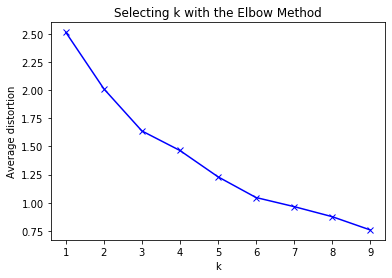

In [6]:

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_scaled)
    prediction=model.predict(X_scaled)
    meanDistortions.append(sum(np.min(cdist(X_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


Though the bend is not coming out clearly as there are many bends, let us look at 2 clusters and 3 clusters

In [7]:
features = list(tech_supp_attributes.columns)

In [8]:
# Let us take with K = 3
final_model=KMeans(3)
final_model.fit(X_scaled)
prediction=final_model.predict(X_scaled)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


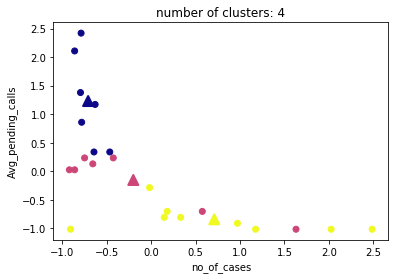

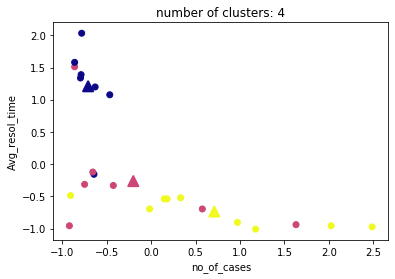

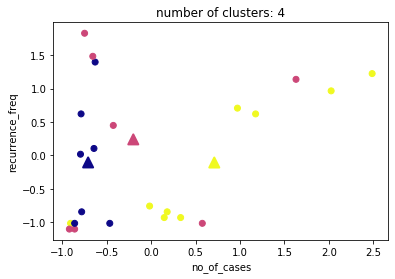

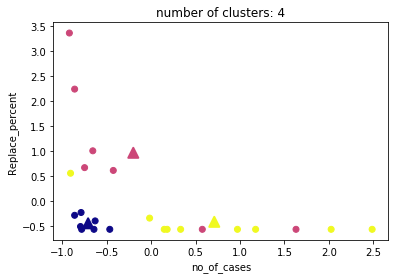

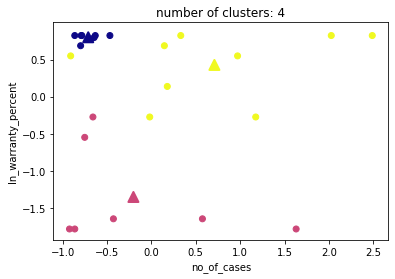

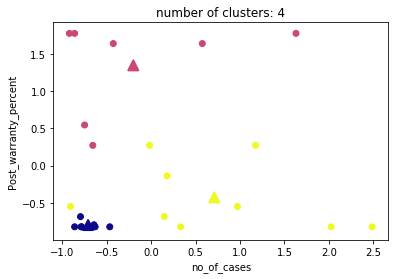

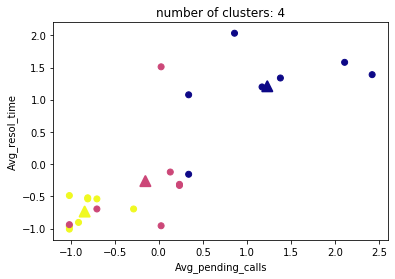

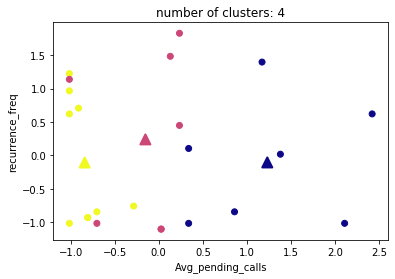

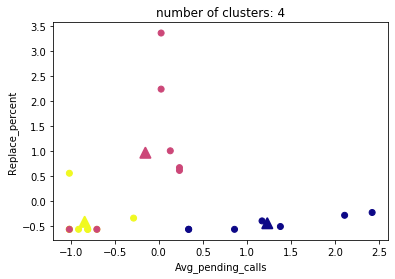

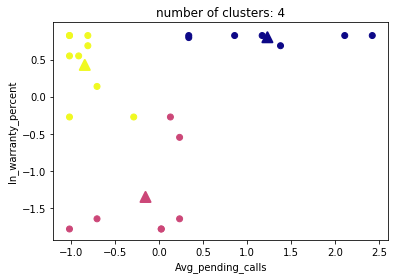

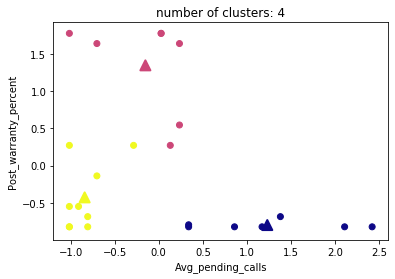

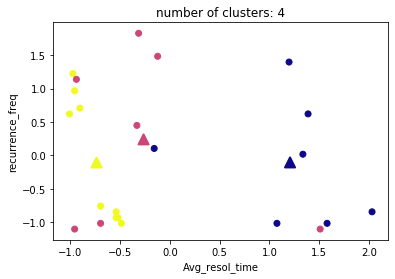

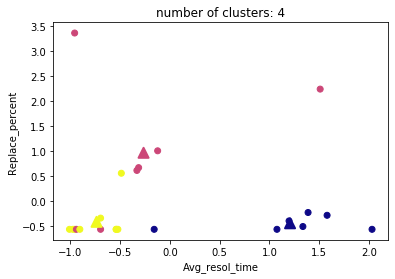

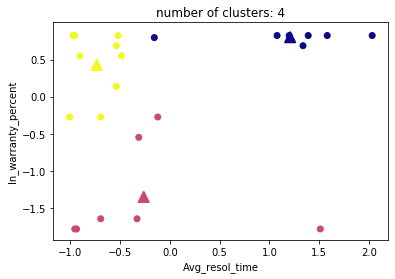

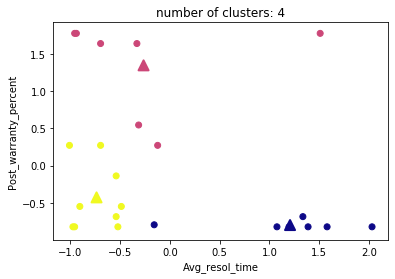

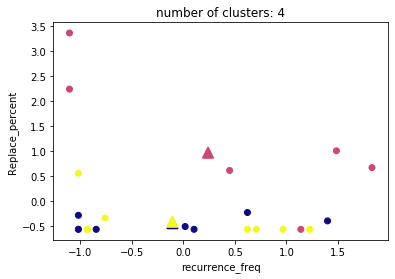

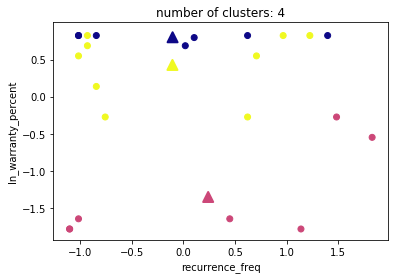

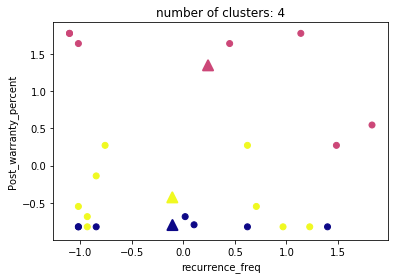

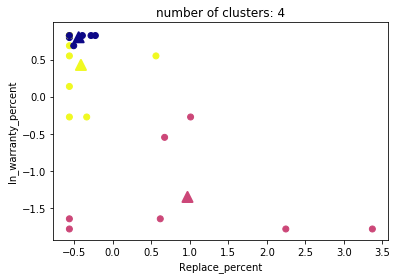

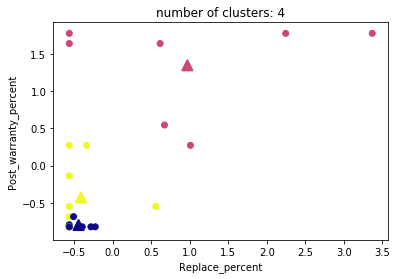

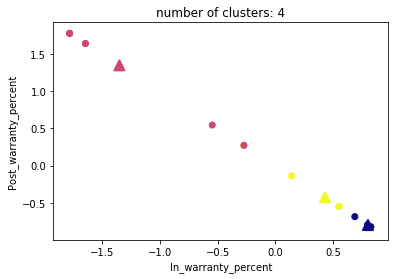

In [9]:
from itertools import combinations 
comb = combinations(list(range(7)), 2)
for i,x in enumerate(comb):
    plt.figure(i)
    # plot the cluster assignments and cluster centers
    plt.scatter(X_scaled[:, x[0]], X_scaled[:, x[1]], c=prediction, cmap="plasma")
    plt.scatter(final_model.cluster_centers_[:, x[0]],   
                final_model.cluster_centers_[:, x[1]],
                marker='^', 
                c=list(range(3)), 
                s=100, 
                linewidth=2,
                cmap="plasma")
    plt.title('number of clusters: %d' %4) 
    plt.xlabel(str(features[x[0]]))
    plt.ylabel(str(features[x[1]]))

In [10]:
#Append the prediction 
tech_supp_df["GROUP"] = prediction
tech_supp_df[["PROBLEM_TYPE", "GROUP"]]

,PROBLEM_TYPE,GROUP
0,Temperature control not working,2
1,power chord does not tightly fit,1
2,Fan swing not working,2
3,Main switch does not on,1
4,Forgot mobile app password,0
5,AC stops abruptly,0
6,App hangs while entring commands,0
7,App takes a long time to initialize,2
8,Unable to connect the App to the device,2
9,Reinstalling the app hangs the phone,0


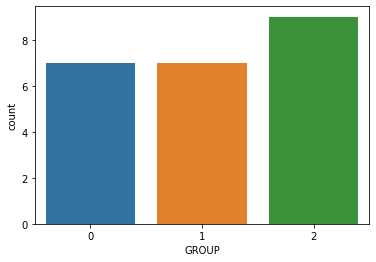

In [11]:
# counts of the clusters
sns.countplot(tech_supp_df["GROUP"])

In [12]:
print("Groups Assigned : \n")
tech_supp_df[["PROBLEM_TYPE", "GROUP"]]
tech_supp_df.info

Groups Assigned : 



<bound method DataFrame.info of                                  PROBLEM_TYPE  no_of_cases  Avg_pending_calls  \
0             Temperature control not working          170                1.3   
1            power chord does not tightly fit           12                2.0   
2                       Fan swing not working            5                1.0   
3                     Main switch does not on            3                2.0   
4                  Forgot mobile app password           45                2.3   
5                           AC stops abruptly           47                3.1   
6            App hangs while entring commands           12                4.0   
7         App takes a long time to initialize          165                1.2   
8     Unable to connect the App to the device          321                1.0   
9        Reinstalling the app hangs the phone           22                3.3   
10       Mobile screen blanks on use of phone           23                4.3

In [13]:
tech_supp_df[tech_supp_df["GROUP"] == 0].head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,0
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,0
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,0
10,Mobile screen blanks on use of phone,23,4.3,143,0.21,0.06,100,0,0


In [14]:
tech_supp_df[tech_supp_df["GROUP"] == 1].head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,1
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,1
11,Cluttered with popup messages,230,1.3,23,0.02,0.00,10,90,1
16,Motor noise from the system,390,1.0,9,0.27,0.00,5,95,1
20,Battery backup does not get fully charged,29,2.2,45,0.35,0.22,50,50,1


In [15]:
tech_supp_df[tech_supp_df["GROUP"] == 2].head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,2
7,App takes a long time to initialize,165,1.2,32,0.03,0.0,95,5,2
8,Unable to connect the App to the device,321,1.0,5,0.21,0.0,60,40,2
12,AC controller sofware missing,193,1.2,33,0.03,0.0,100,0,2


## KModes

In [16]:
from kmodes.kmodes import KModes

In [17]:
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(X_scaled)
#prediction=km.predict(X_scaled)
# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 101.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5, cost: 104.0
Run 2, iteration: 2/100, moves: 2, cost: 103.0
Run 2, iteration: 3/100, moves: 0, cost: 103.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2, cost: 107.0
Run 3, iteration: 2/100, moves: 0, cost: 107.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3, cost: 103.0
Run 4, iteration: 2/100, moves: 0, cost: 103.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4, cost: 104.0
Run 5, iteration: 2/100, moves: 0, cost: 104.0
Best run was number 1
[[-0.90832284 -1.01335683 -0.53835137 -1.01557265 -0.56146347  0.82244889
  -0.82244889]
 [-0.65781032 -1.01

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


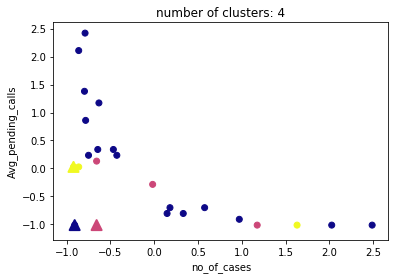

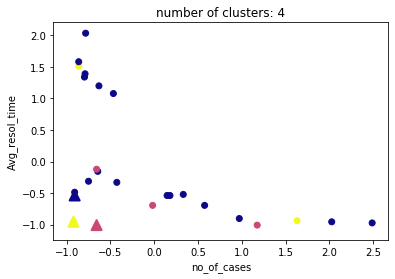

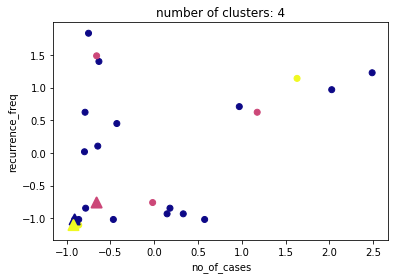

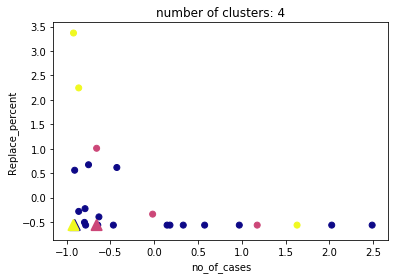

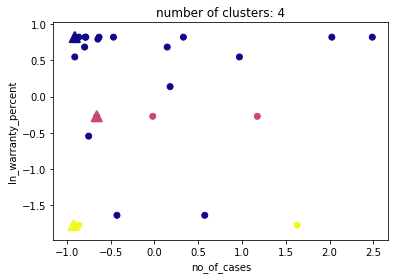

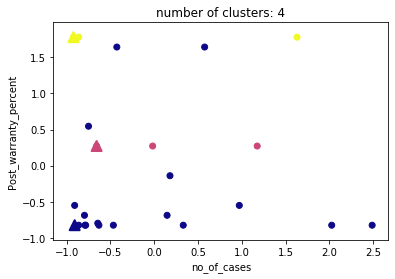

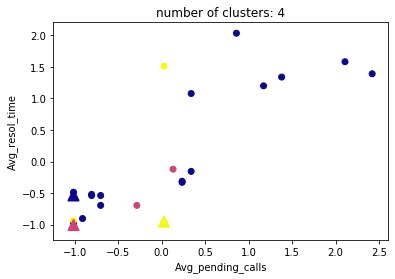

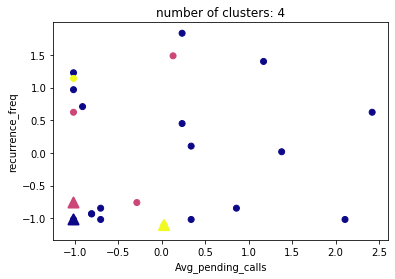

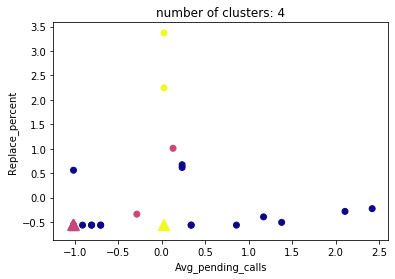

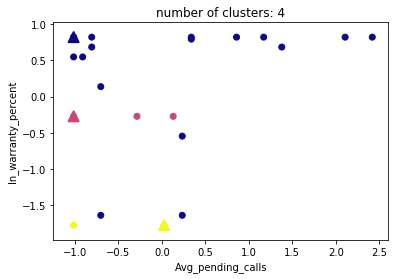

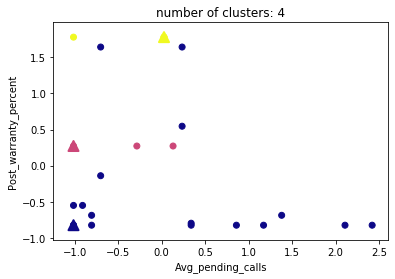

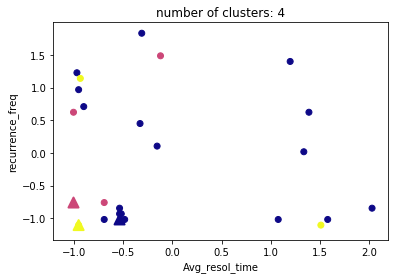

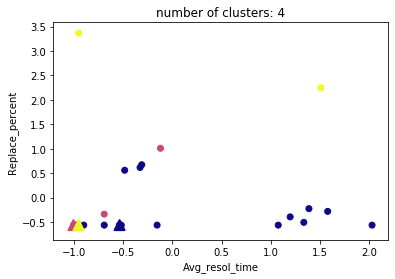

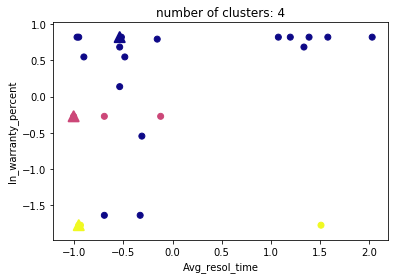

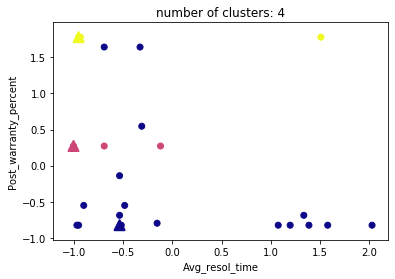

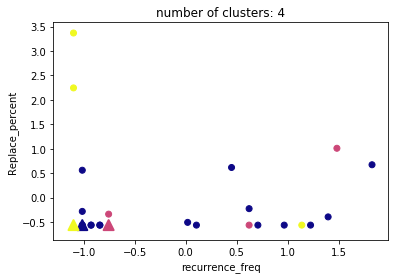

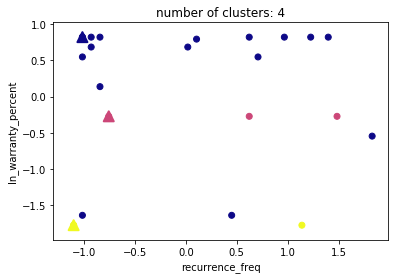

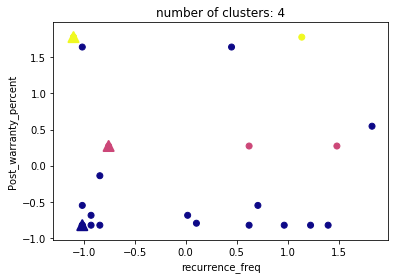

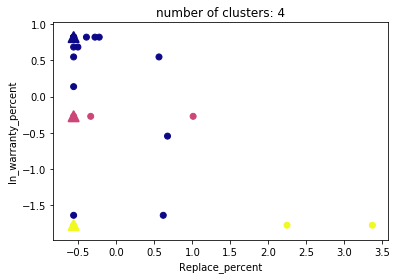

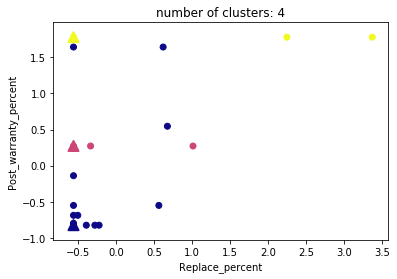

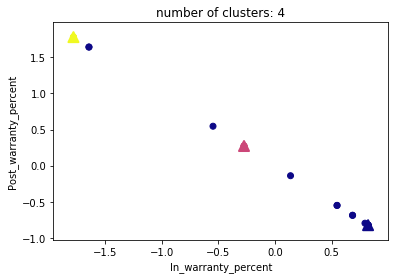

In [18]:
from itertools import combinations 
comb = combinations(list(range(7)), 2)
for i,x in enumerate(comb):
    plt.figure(i)
    # plot the cluster assignments and cluster centers
    plt.scatter(X_scaled[:, x[0]], X_scaled[:, x[1]], c=clusters, cmap="plasma")
    plt.scatter(km.cluster_centroids_[:, x[0]],   
                km.cluster_centroids_[:, x[1]],
                marker='^', 
                c=list(range(3)), 
                s=100, 
                linewidth=2,
                cmap="plasma")
    plt.title('number of clusters: %d' %4) 
    plt.xlabel(str(features[x[0]]))
    plt.ylabel(str(features[x[1]]))

In [19]:
#Append the prediction 
tech_supp_df["GROUP"] = prediction
tech_supp_df[["PROBLEM_TYPE", "GROUP"]]

,PROBLEM_TYPE,GROUP
0,Temperature control not working,2
1,power chord does not tightly fit,1
2,Fan swing not working,2
3,Main switch does not on,1
4,Forgot mobile app password,0
5,AC stops abruptly,0
6,App hangs while entring commands,0
7,App takes a long time to initialize,2
8,Unable to connect the App to the device,2
9,Reinstalling the app hangs the phone,0


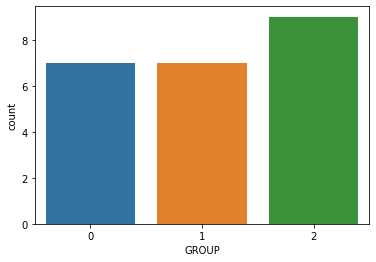

In [20]:
# counts of the clusters
sns.countplot(tech_supp_df["GROUP"])

In [21]:
tech_supp_df[tech_supp_df["GROUP"] == 0].head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,0
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,0
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,0
10,Mobile screen blanks on use of phone,23,4.3,143,0.21,0.06,100,0,0


In [22]:
tech_supp_df[tech_supp_df["GROUP"] == 1].head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,1
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,1
11,Cluttered with popup messages,230,1.3,23,0.02,0.00,10,90,1
16,Motor noise from the system,390,1.0,9,0.27,0.00,5,95,1
20,Battery backup does not get fully charged,29,2.2,45,0.35,0.22,50,50,1


In [23]:
tech_supp_df[tech_supp_df["GROUP"] == 2].head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,2
7,App takes a long time to initialize,165,1.2,32,0.03,0.0,95,5,2
8,Unable to connect the App to the device,321,1.0,5,0.21,0.0,60,40,2
12,AC controller sofware missing,193,1.2,33,0.03,0.0,100,0,2


## DBSCAN

In [24]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


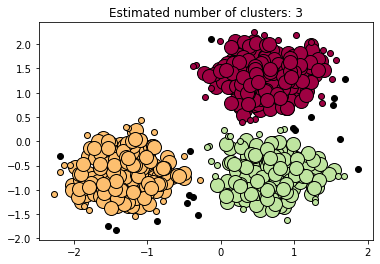

In [25]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()